### Import library


In [2]:
# data analysis
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# os
import os

In [31]:
from IPython.display import display, HTML

# display(HTML(df.to_html()))

### Import data

In [3]:
train_df_path = os.path.join('..', 'Data', 'Supplementary Information File 1 (SIF-1).xlsx')
test_df_path = os.path.join('..', 'Data', 'Supplementary Information File 2 (SIF-2).xlsx')

In [39]:
train_df = pd.read_excel(train_df_path)
test_df = pd.read_excel(test_df_path)

In [7]:
train_df.head()

,S.No,Compound,A,B,In literature,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,1,Ac2O3,Ac,Ac,False,cubic,element not in BV,element not in BV,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000
1,2,AcAgO3,Ac,Ag,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571
2,3,AcAlO3,Ac,Al,False,cubic,element not in BV,element not in BV,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714
3,4,AcAsO3,Ac,As,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429
4,5,AcAuO3,Ac,Au,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286


In [8]:
test_df.head()

,S.No,Compound,A,B,In literature,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,81,AgBiO3,Ag,Bi,False,rhombohedral,1,5,1.28,0.95,0.76,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,4.072914,0.542857
1,107,AgMoO3,Ag,Mo,False,cubic,1,5,1.28,0.95,0.61,1.93,2.16,2.761453,1.789300,-1.663536,0.942809,4.126280,0.435714
2,109,AgNbO3,Ag,Nb,True,rhombohedral,1,5,1.28,0.95,0.64,1.93,1.60,2.761453,1.955055,-1.972571,0.928944,4.072890,0.457143
3,122,AgReO3,Ag,Re,False,cubic,1,5,1.28,0.95,0.58,1.93,1.90,2.761453,1.987971,-1.729357,0.957094,4.201732,0.414286
4,125,AgSbO3,Ag,Sb,True,orthorhombic,1,5,1.28,0.95,0.60,1.93,2.05,2.761453,2.075849,-1.696143,0.947523,4.148925,0.428571


### Data Analysis

In [9]:
train_df.columns.values

array(['S.No', 'Compound', 'A', 'B', 'In literature', 'Lowest distortion',
       'v(A)', 'v(B)', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)', 'EN(A)',
       'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'τ', 'μ'],
      dtype=object)

In [10]:
train_df.dtypes

S.No                   int64
Compound              object
A                     object
B                     object
In literature           bool
Lowest distortion     object
v(A)                  object
v(B)                  object
r(AXII)(Å)           float64
r(AVI)(Å)            float64
r(BVI)(Å)            float64
EN(A)                float64
EN(B)                float64
l(A-O)(Å)            float64
l(B-O)(Å)            float64
ΔENR                 float64
tG                   float64
τ                     object
μ                    float64
dtype: object

In [11]:
train_df['Lowest distortion'].value_counts()

Lowest distortion
cubic           3253
orthorhombic    1573
rhombohedral     323
tetragonal       127
-                 53
Name: count, dtype: int64

In [13]:
train_df['v(A)'].value_counts()

v(A)
not balanced         1881
element not in BV    1233
3                     935
2                     884
1                     222
4                     146
5                      28
Name: count, dtype: int64

In [14]:
train_df['v(B)'].value_counts()

v(B)
not balanced         1881
element not in BV    1233
3                     935
4                     884
5                     222
2                     146
1                      28
Name: count, dtype: int64

In [15]:
train_df['τ'].info

<bound method Series.info of 0              -
1              -
2              -
3              -
4              -
          ...   
5324    5.228952
5325           -
5326           -
5327           -
5328           -
Name: τ, Length: 5329, dtype: object>

In [16]:
train_df.isnull().sum()

S.No                 0
Compound             0
A                    0
B                    0
In literature        0
Lowest distortion    0
v(A)                 0
v(B)                 0
r(AXII)(Å)           0
r(AVI)(Å)            0
r(BVI)(Å)            0
EN(A)                0
EN(B)                0
l(A-O)(Å)            0
l(B-O)(Å)            0
ΔENR                 0
tG                   0
τ                    0
μ                    0
dtype: int64

In [17]:
train_df.describe()

,S.No,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ
count,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000
mean,2665.000000,0.974656,0.825617,0.817845,1.572466,1.572466,2.289800,2.012587,-2.199993,0.766090,0.584176
std,1538.494123,0.337139,0.245000,0.247480,0.449248,0.449248,0.664239,0.598509,0.668465,0.136280,0.176770
min,1.000000,0.270000,0.270000,0.270000,0.790000,0.790000,0.000000,0.000000,-5.411536,0.384648,0.192857
25%,1333.000000,0.690000,0.630000,0.630000,1.200000,1.200000,2.290644,1.956808,-2.604821,0.668537,0.450000
50%,2665.000000,0.930000,0.800000,0.770000,1.550000,1.550000,2.393444,2.096141,-2.101179,0.756440,0.550000
75%,3997.000000,1.180000,0.950000,0.950000,1.930000,1.930000,2.571812,2.286435,-1.711500,0.850628,0.678571
max,5329.000000,1.880000,1.670000,1.670000,2.540000,2.540000,3.300176,3.009747,-0.601714,1.388809,1.192857


In [18]:
train_df.describe(include=['O'])

,Compound,A,B,Lowest distortion,v(A),v(B),τ
count,5329,5329,5329,5329,5329,5329,5329
unique,5329,73,73,5,7,7,1608
top,Ac2O3,Ac,Ac,cubic,not balanced,not balanced,-
freq,1,73,73,3253,1881,1881,3143


### Assumptions based on data analysis

### Analysis using pivot tables

In [30]:
train_df[['A','Lowest distortion']].groupby(['A']).describe()


Lowest distortion                          
               count unique           top freq
A                                             
Ac                73      4  orthorhombic   51
Ag                73      4  orthorhombic   30
Al                73      3         cubic   40
As                73      3         cubic   63
Au                73      3         cubic   57
..               ...    ...           ...  ...
W                 73      3         cubic   56
Y                 73      3         cubic   51
Yb                73      3  orthorhombic   43
Zn                73      3         cubic   54
Zr                73      2         cubic   54

[73 rows x 4 columns]

In [32]:
df = train_df[['A','Lowest distortion']].groupby(['A']).describe()
display(HTML(df.to_html()))

In [29]:
train_df[['A','Lowest distortion']].groupby(['Lowest distortion']).describe()


A                
                  count unique top freq
Lowest distortion                      
-                    53     23  Ni   14
cubic              3253     73   B   73
orthorhombic       1573     72  Sr   54
rhombohedral        323     54  Cu   27
tetragonal          127     42  Cs   19

### Data Visualization

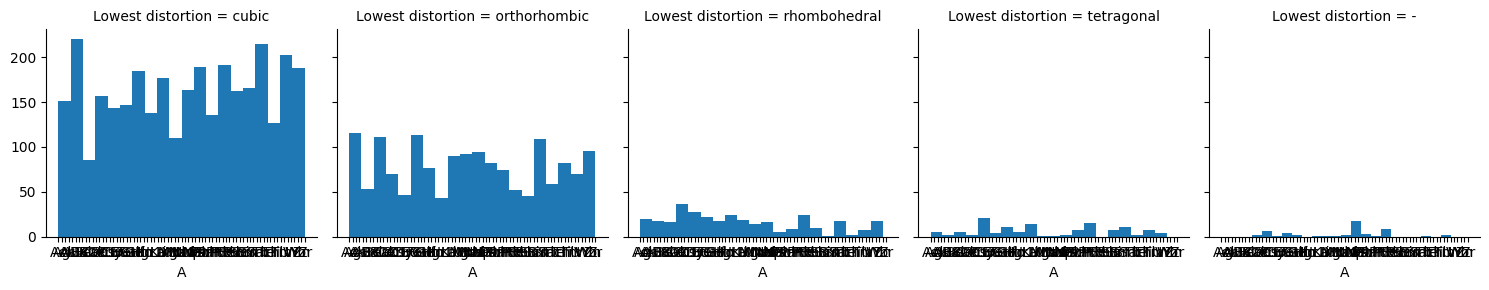

In [33]:
g = sns.FacetGrid(train_df, col='Lowest distortion')
g.map(plt.hist, 'A', bins=20)

### Feature Engineering

#### Converting a categorical feature( one hot encoding)

In [43]:
train_df_new = train_df[train_df['v(A)'] != 'element not in BV']
train_df_new = train_df_new[train_df['v(A)'] != 'not balanced']
train_df_new = train_df_new[train_df['v(B)'] != 'element not in BV']
train_df_new = train_df_new[train_df['v(B)'] != 'not balanced']
train_df_new

C:\Users\Asus\AppData\Local\Temp\ipykernel_28112\2560218516.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df_new = train_df_new[train_df['v(A)'] != 'not balanced']
C:\Users\Asus\AppData\Local\Temp\ipykernel_28112\2560218516.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df_new = train_df_new[train_df['v(B)'] != 'element not in BV']
C:\Users\Asus\AppData\Local\Temp\ipykernel_28112\2560218516.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_df_new = train_df_new[train_df['v(B)'] != 'not balanced']


,S.No,Compound,A,B,In literature,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
76,77,AgAsO3,Ag,As,False,tetragonal,1,5,1.28,0.95,0.46,1.93,2.18,2.761453,1.932227,-1.389214,1.018842,4.762492,0.328571
78,79,AgBO3,Ag,B,False,cubic,3,3,0.75,0.95,0.27,1.93,2.04,2.761453,1.624662,-0.852321,0.910347,4.341915,0.192857
81,82,AgBiO3,Ag,Bi,False,rhombohedral,1,5,1.28,0.95,0.76,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,4.072914,0.542857
86,87,AgCrO3,Ag,Cr,False,orthorhombic,1,5,1.28,0.95,0.49,1.93,1.66,2.761453,1.960053,-1.679964,1.002670,4.577636,0.350000
100,101,AgIrO3,Ag,Ir,False,rhombohedral,1,5,1.28,0.95,0.57,1.93,2.20,2.761453,2.009083,-1.574536,0.961952,4.232002,0.407143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5314,5315,ZrTaO3,Zr,Ta,False,cubic,1,5,0.89,0.72,0.64,1.33,1.50,2.383420,1.956808,-1.885214,0.793762,5.404668,0.457143
5319,5320,ZrTiO3,Zr,Ti,False,cubic,2,4,0.89,0.72,0.61,1.33,1.54,2.383420,1.927849,-1.813036,0.805609,6.019599,0.435714
5322,5323,ZrUO3,Zr,U,False,orthorhombic,1,5,0.89,0.72,0.76,1.33,1.38,2.383420,2.047800,-2.161214,0.749664,8.258382,0.542857
5323,5324,ZrVO3,Zr,V,False,cubic,1,5,0.89,0.72,0.54,1.33,1.63,2.383420,1.758039,-1.645679,0.834678,4.891183,0.385714


In [45]:
vA1=train_df['v(A)']==1
vA2=train_df['v(A)']==2
vA3=train_df['v(A)']==3
train_df_new['v(A)1'] = vA1
train_df_new['v(A)2'] = vA2
train_df_new['v(A)3'] = vA3

vB1=train_df['v(B)']==1
vB2=train_df['v(B)']==2
vB3=train_df['v(B)']==3
train_df_new['v(B)1'] = vB1
train_df_new['v(B)2'] = vB2
train_df_new['v(B)3'] = vB3
train_df_new

,S.No,Compound,A,B,In literature,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),...,ΔENR,tG,τ,μ,v(A)1,v(A)2,v(A)3,v(B)1,v(B)2,v(B)3
76,77,AgAsO3,Ag,As,False,tetragonal,1,5,1.28,0.95,...,-1.389214,1.018842,4.762492,0.328571,True,False,False,False,False,False
78,79,AgBO3,Ag,B,False,cubic,3,3,0.75,0.95,...,-0.852321,0.910347,4.341915,0.192857,False,False,True,False,False,True
81,82,AgBiO3,Ag,Bi,False,rhombohedral,1,5,1.28,0.95,...,-1.992714,0.877336,4.072914,0.542857,True,False,False,False,False,False
86,87,AgCrO3,Ag,Cr,False,orthorhombic,1,5,1.28,0.95,...,-1.679964,1.002670,4.577636,0.350000,True,False,False,False,False,False
100,101,AgIrO3,Ag,Ir,False,rhombohedral,1,5,1.28,0.95,...,-1.574536,0.961952,4.232002,0.407143,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5314,5315,ZrTaO3,Zr,Ta,False,cubic,1,5,0.89,0.72,...,-1.885214,0.793762,5.404668,0.457143,True,False,False,False,False,False
5319,5320,ZrTiO3,Zr,Ti,False,cubic,2,4,0.89,0.72,...,-1.813036,0.805609,6.019599,0.435714,False,True,False,False,False,False
5322,5323,ZrUO3,Zr,U,False,orthorhombic,1,5,0.89,0.72,...,-2.161214,0.749664,8.258382,0.542857,True,False,False,False,False,False
5323,5324,ZrVO3,Zr,V,False,cubic,1,5,0.89,0.72,...,-1.645679,0.834678,4.891183,0.385714,True,False,False,False,False,False


In [46]:
train_df_new=train_df_new.drop(['v(A)' , 'v(B)'],axis=1)
train_df_new

,S.No,Compound,A,B,In literature,Lowest distortion,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),...,ΔENR,tG,τ,μ,v(A)1,v(A)2,v(A)3,v(B)1,v(B)2,v(B)3
76,77,AgAsO3,Ag,As,False,tetragonal,1.28,0.95,0.46,1.93,...,-1.389214,1.018842,4.762492,0.328571,True,False,False,False,False,False
78,79,AgBO3,Ag,B,False,cubic,0.75,0.95,0.27,1.93,...,-0.852321,0.910347,4.341915,0.192857,False,False,True,False,False,True
81,82,AgBiO3,Ag,Bi,False,rhombohedral,1.28,0.95,0.76,1.93,...,-1.992714,0.877336,4.072914,0.542857,True,False,False,False,False,False
86,87,AgCrO3,Ag,Cr,False,orthorhombic,1.28,0.95,0.49,1.93,...,-1.679964,1.002670,4.577636,0.350000,True,False,False,False,False,False
100,101,AgIrO3,Ag,Ir,False,rhombohedral,1.28,0.95,0.57,1.93,...,-1.574536,0.961952,4.232002,0.407143,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5314,5315,ZrTaO3,Zr,Ta,False,cubic,0.89,0.72,0.64,1.33,...,-1.885214,0.793762,5.404668,0.457143,True,False,False,False,False,False
5319,5320,ZrTiO3,Zr,Ti,False,cubic,0.89,0.72,0.61,1.33,...,-1.813036,0.805609,6.019599,0.435714,False,True,False,False,False,False
5322,5323,ZrUO3,Zr,U,False,orthorhombic,0.89,0.72,0.76,1.33,...,-2.161214,0.749664,8.258382,0.542857,True,False,False,False,False,False
5323,5324,ZrVO3,Zr,V,False,cubic,0.89,0.72,0.54,1.33,...,-1.645679,0.834678,4.891183,0.385714,True,False,False,False,False,False


### Missing Data handling